In [158]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (3).csv


In [159]:
  !pip install category_encoders==2.*
  !pip install pdpbox
  !pip install shap

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap
pd.options.display.max_rows = 200

**EDA**


In [161]:


df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [162]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [163]:
df.shape

(5110, 12)

In [164]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [165]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [166]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [167]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Pair Plot**

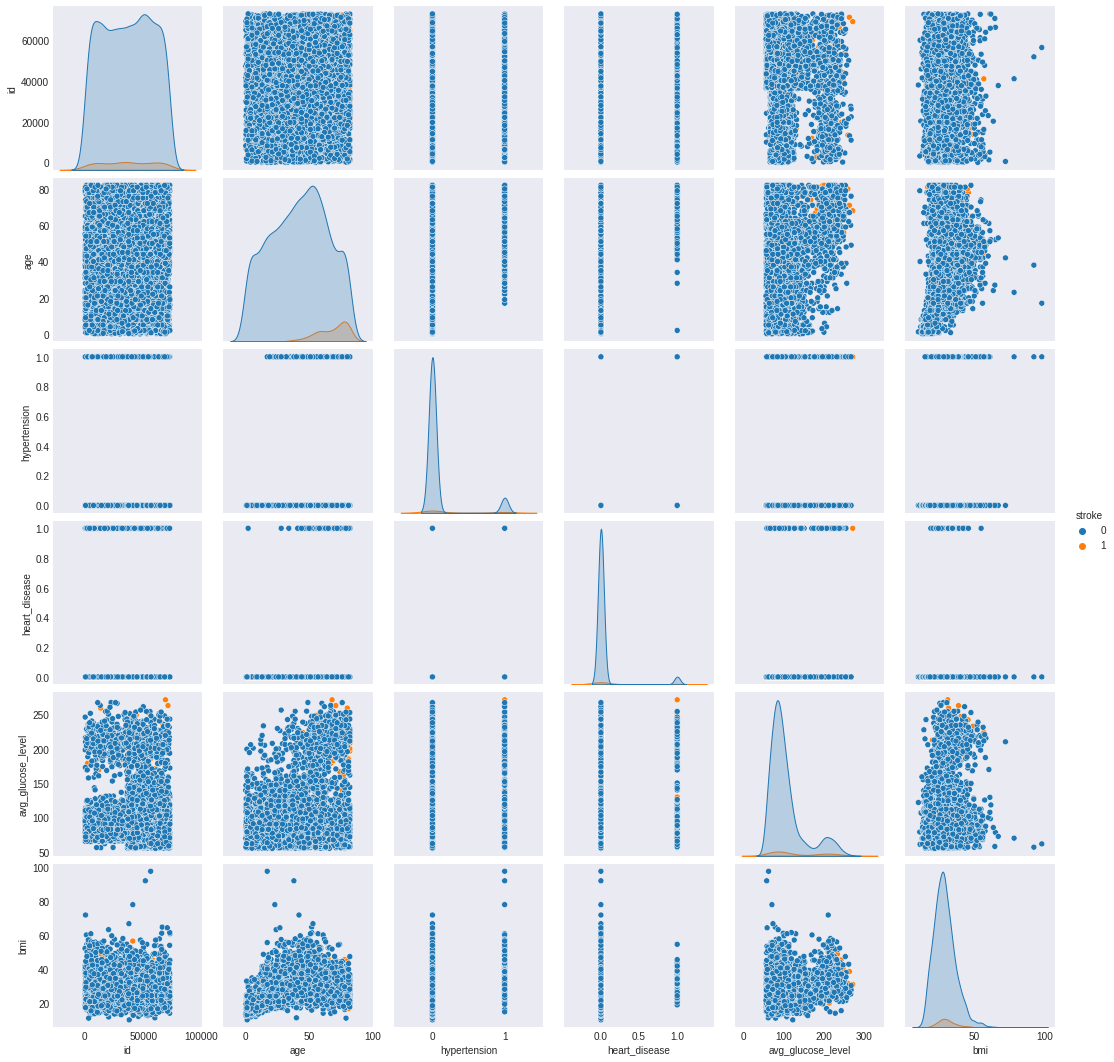

In [169]:
plt.style.use('seaborn-dark')
sns.pairplot(df,hue='stroke')


**Correlation**

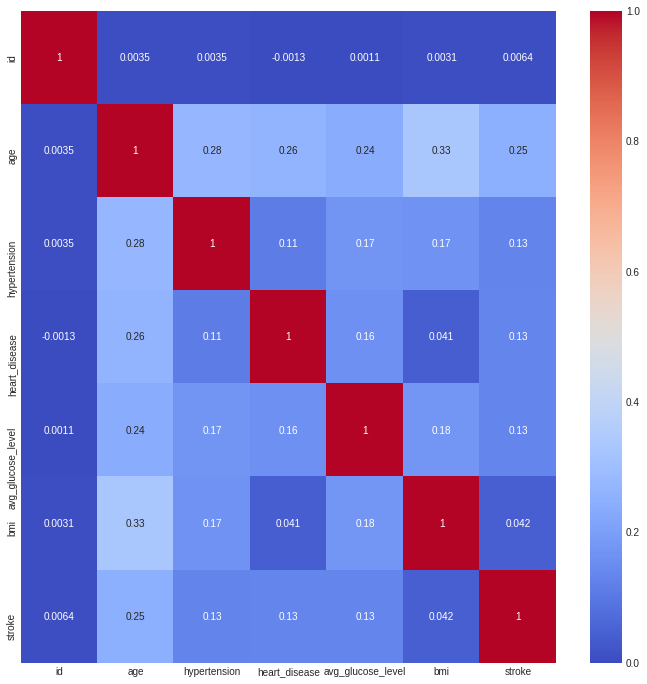

In [170]:
#Correlation
corrmat = df.corr()
feature_ind = corrmat.index

plt.figure(figsize=(12,12))

sns.heatmap(df[feature_ind].corr(),annot=True,cmap='coolwarm')
plt.show()

In [171]:
#Finding Null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [172]:
# printing out the second value in the bmi to double check if it gets fix on the next step. 
df['bmi'][1]

nan

In [173]:
#Fixing the NaN in bmi with mean values
df_male = df[df['gender'] =='Male']
df_female = df[df['gender']=='Female']
print('Mean for male:', df_male['bmi'].mean())
print('Mean for female:',df_female['bmi'].mean())
df['bmi'] = df['bmi'].fillna(df.groupby('gender')['bmi'].transform('mean'))

Mean for male: 28.647936350074616
Mean for female: 29.065757680359038


In [174]:
#Checking if bmi got fill in with the mean
df['bmi'][1]

29.065757680359038

In [175]:
#Checking if Nan are gone
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [176]:
#number of females
(df['gender'] =='Female').sum()

2994

In [177]:
#number of males 
(df['gender']=='Male').sum()

2115

In [178]:
# number of females and males
df[['gender','id','stroke']].groupby('gender').count()

,id,stroke
gender,,
Female,2994,2994
Male,2115,2115
Other,1,1


In [179]:
#Locate the Other gender to remove
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [180]:
df = df.drop(3116)

In [181]:
#Checking that gender: Other, is gone
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [182]:
#Dropping ID since it doesn't contribute to the prediction. 
df = df.drop('id',axis=1)

In [183]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [184]:
df.shape

(5109, 11)

**Encoding**

In [185]:
#Finding categorical columns
df._get_numeric_data()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,29.065758,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,29.065758,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [186]:
#Encoding Catergorical variables using Lambda (one hot encoding)
df['gender'] = df['gender'].apply(lambda x: 1 if x=='Male' else 0)
df['ever_married'] = df['ever_married'].apply(lambda x:1 if x=='Yes' else 0)
df['Residence_type'] = df['Residence_type'].apply(lambda x:1 if x=='Urban' else 0)

In [187]:
# using dummies to encode (Not recommended for future projects)
df = pd.get_dummies(data=df, columns=['work_type', 'smoking_status'])

In [188]:
#New df with encoded data 
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.065758,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


In [189]:
df.shape

(5109, 18)

**Correlation after EDA, encodding, and cleaning the dataset**

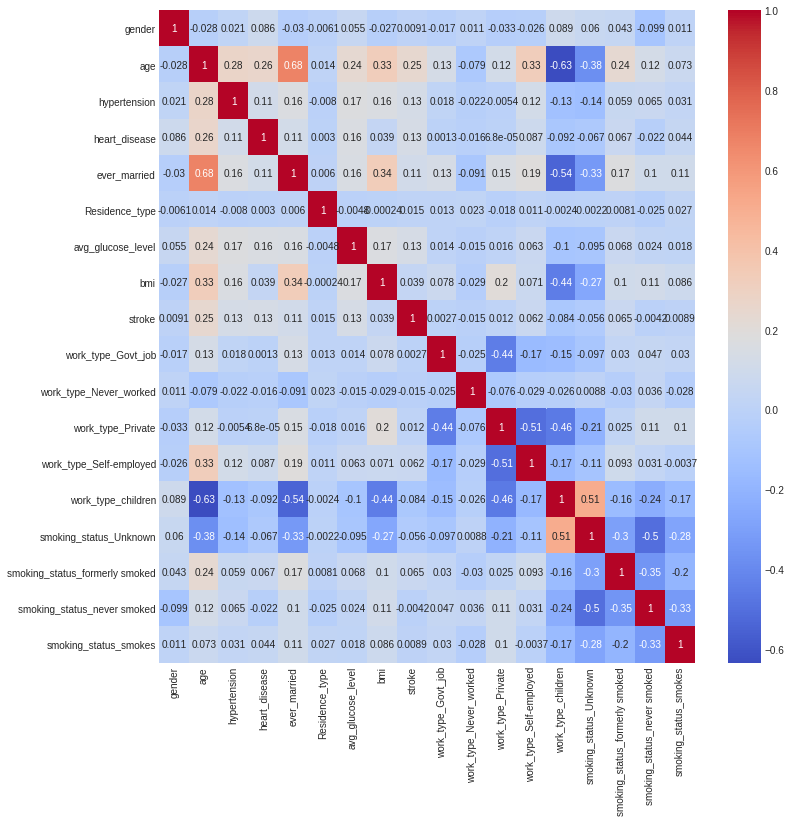

In [190]:
#Correlation after cleaning the dataset
#Correlation
corrmat = df.corr()
feature_ind = corrmat.index

plt.figure(figsize=(12,12))

sns.heatmap(df[feature_ind].corr(),annot=True,cmap='coolwarm')
plt.show()

**Split**

In [191]:
# Split Data
target = 'stroke'
X,y = df.drop(columns=target),df[target]

In [192]:
X.shape

(5109, 17)

In [193]:
y.shape

(5109,)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

**Scaling**

In [195]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Baseline**

In [196]:
#Baseline
y_pred_bl = [y_train.mean()]*len(y_train)
print('Mean stroke',y_train.mean())
print('Baseline MAE',mean_absolute_error(y_train,y_pred_bl))

Mean stroke 0.04530201342281879
Baseline MAE 0.0864994820053151


**Logistic Regression**

In [197]:
LR_model = LogisticRegression(max_iter=2000) #??? To refresh Is this too many iterations???

In [198]:
#Model fitting
LR_model.fit(X_train,y_train)
y_pred_LR = LR_model.predict(X_test)


In [199]:
#Model Score
pred_train_LR = LR_model.predict(X_train)
pred_test_LR = LR_model.predict(X_test)

In [200]:
#Accuracy score
LR_train_score = LR_model.score(X_train,y_train)
LR_test_score = LR_model.score(X_test,y_test)

In [201]:
#F1 score
LR_f1_score = metrics.f1_score(y_test,pred_test_LR)
LR_recall = metrics.recall_score(y_test,pred_test_LR)

In [202]:
#Printing results and getting a classification report
print('Accuracy train',LR_train_score)
print('Accuracy test',LR_test_score)
print('F1 score test',LR_f1_score)
print(metrics.classification_report(y_test,pred_test_LR))

Accuracy train 0.9541387024608501
Accuracy test 0.943900848010437
F1 score test 0.022727272727272724
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       1.00      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



**Random Forest**

In [203]:
rfc =RandomForestClassifier(n_estimators=100) #To refresh on n_job=-1 What is it for???
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [204]:

#Calculating Training and Testing Score   ***????To refresh, why exactly is the training score 1.0???
rfc_score = rfc.score(X_train,y_train)
rfc_test = rfc.score(X_test,y_test)
pred = rfc.predict(X_test)
print('Training score:',rfc_score )
print('Testing score:', rfc_test)

Training score: 1.0
Testing score: 0.9419439008480104


In [205]:
#Classification report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



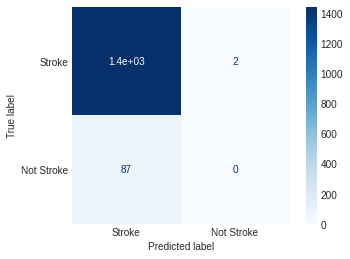

In [206]:
#Confusion metrix
plot_confusion_matrix(rfc,X_test,y_test,display_labels=['Stroke','Not Stroke'],cmap='Blues');


**Communicating the Model**

The dataset set is balanced for gender -male and female; there was only one value, Other, for gender which was dropped as long with the Id column because these columns not contributing to the model. A correlation graph was produced before and after the EDA and encoding to keep track of transformations. After splitting and scaling the data, the baseline MAE is 0.086; using Logistic Regression the accuracy score of test set is 0.943900 , and using a random forest the score for the test set is 0.942596. There is a correlation between age, BMI, and average glucose level. The strongest correlation is between age and married status -a positive correlation. 

